## SMS Spam Classification

In [84]:
import os
import pandas as pd
import numpy as np

In [85]:
os.listdir()

['SMS+Classifier+_+Multinomial+Naive+Bayes.ipynb',
 '.ipynb_checkpoints',
 'sms_classification.ipynb',
 'SMSSpamCollection']

In [86]:
tbl = pd.read_table('SMSSpamCollection', header=None, names=['Class', 'sms'])

In [87]:
tbl.shape

(5572, 2)

In [88]:
tbl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Class   5572 non-null   object
 1   sms     5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [89]:
tbl.Class.value_counts()

ham     4825
spam     747
Name: Class, dtype: int64

In [90]:
print('ham % is ', tbl.Class.value_counts()[0]/tbl.Class.shape[0]*100)
print('spam % is ', tbl.Class.value_counts()[1]/tbl.Class.shape[0]*100)

ham % is  86.59368269921033
spam % is  13.406317300789663


### There is a class Imbalance

## Steps to follow 

0) convert class to numeric type

1) do test train split first

2) bag of words

3) convert bag of words to sparse matrix

4) fit and transform

## convert the class column to numeric type

In [91]:
cls_dict = {0 : 'ham', 1 : 'spam'}
key_lst, val_lst = [], []
for k,v in cls_dict.items():
    key_lst.append(k)
    val_lst.append(v)

In [92]:
tbl.Class = tbl.Class.map({'ham':0, 'spam':1})

In [93]:
tbl.Class.value_counts()

0    4825
1     747
Name: Class, dtype: int64

## Do a test-train split since test set will not be seen by the model and the bag of words should not contain things from test set

## Train-Test split

In [94]:
from sklearn.model_selection import train_test_split

In [95]:
tbl_train, tbl_test = train_test_split(tbl, random_state=1)

In [96]:
tbl_train.shape[0]/tbl.shape[0]

0.75

In [98]:
tbl_test.Class.value_counts()

0    1208
1     185
Name: Class, dtype: int64

## Get bag of words 

### convert tbl x to numpy array

In [99]:
tbl_train.head()

,Class,sms
710,1,4mths half price Orange line rental & latest c...
3740,0,Did you stitch his trouser
2711,1,Hope you enjoyed your new content. text stop t...
3155,1,Not heard from U4 a while. Call 4 rude chat pr...
3748,0,Ü neva tell me how i noe... I'm not at home in...


In [118]:
tbl_arr = tbl_train.values
y_train = tbl_arr[:,0].astype('int')
X_train = tbl_arr[:,1]

In [119]:
y_train

array([1, 0, 1, ..., 0, 1, 0])

In [120]:
tbl_arr = tbl_test.values
y_test = tbl_arr[:,0].astype('int')
X_test = tbl_arr[:,1]

In [121]:
from sklearn.feature_extraction.text import CountVectorizer

In [122]:
vec = CountVectorizer(stop_words='english')
vec.fit(X_train)
len(vec.vocabulary_)

7204

### vocabulary_ has features with some index ids 

## Transform to sparse matrix

In [123]:
X_train_transform = vec.transform(X_train)
X_test_transform = vec.transform(X_test)

In [124]:
print(X_test_transform)

  (0, 5023)	1
  (0, 7158)	1
  (1, 2959)	1
  (1, 4042)	1
  (1, 4243)	1
  (1, 5034)	1
  (1, 7160)	1
  (2, 961)	1
  (2, 6936)	1
  (3, 3142)	1
  (4, 1032)	1
  (4, 1547)	1
  (4, 2015)	1
  (4, 2750)	1
  (4, 3803)	1
  (4, 5012)	1
  (4, 5721)	1
  (4, 5821)	2
  (4, 6857)	1
  (4, 7089)	1
  (5, 1794)	1
  (5, 2988)	1
  (5, 4578)	1
  (5, 6376)	1
  (5, 6852)	1
  :	:
  (1390, 4526)	1
  (1390, 5591)	1
  (1390, 5598)	2
  (1390, 6321)	1
  (1390, 6346)	1
  (1391, 2515)	1
  (1391, 3489)	1
  (1391, 4246)	1
  (1391, 4310)	1
  (1391, 5868)	1
  (1391, 6614)	1
  (1391, 6684)	1
  (1391, 6789)	1
  (1391, 6987)	2
  (1391, 6996)	1
  (1391, 7041)	1
  (1391, 7110)	1
  (1392, 842)	1
  (1392, 2343)	1
  (1392, 2789)	1
  (1392, 3067)	1
  (1392, 4130)	2
  (1392, 4354)	1
  (1392, 5396)	1
  (1392, 6852)	1


In [125]:
print(X_test_transform.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


## Build Multinomial Naive Bayes Model

In [126]:
from sklearn.naive_bayes import MultinomialNB

In [127]:
mnb = MultinomialNB()
mnb.fit(X_train_transform, y_train)
prob = mnb.pre'movie_review_train.csv'dict_proba(X_test_transform)
y_pred_test = mnb.predict(X_test_transform)

### Note that prob is the predicted probabilities and thresholding with optimal threshold must be found to get class info from the model. predict function automatically assumes a threshild for the model without ROC/PR curve

In [128]:
mnb'movie_review_train.csv'

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

### Note here alpha is the Laplace smoothing factor used and is 1

## Model Evaluation

In [129]:
from sklearn import metrics

In [131]:
confusion_mat = metrics.confusion_matrix(y_test, y_pred_test)

In [132]:
TN = confusion_mat[0,0]
TP = confusion_mat[1,1]
FN = confusion_mat[1,0]
FP = confusion_mat[0,1]

### According to bussiness problem we need FP (ham as spam prediction) minimized

In [134]:
sensitivity = TP/(TP+FN)
sensitivity

0.9459459459459459

In [136]:
specificity = TN/(TN+FP)
specificity

0.9942052980132451

In [137]:
accuracy = (TP+TN)/(TP+TN+FP+FN)
accuracy

0.9877961234745154

In [139]:
metrics.f1_score(y_test, y_pred_test)

0.9536784741144414

In [140]:
precision = TP/(TP+FP)
precision

0.9615384615384616

## For the problem Specificity plays important role

In [142]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

### Note that the probabilities we got from multinomialNB has two columns since we have 2 classes

In [150]:
prob.shape

(1393, 2)

In [151]:
cls_dict

{0: 'ham', 1: 'spam'}

In [154]:
fpr, tpr, thr = roc_curve(y_test, prob[:, 1])
roc_auc = auc(fpr, tpr)

In [155]:
roc_auc

0.9921872203329157

In [158]:
pd.DataFrame({'Thr': thr, 'TPR':tpr, 'FPR':fpr})

,Thr,TPR,FPR
0,2.000000e+00,0.000000,0.000000
1,1.000000e+00,0.308108,0.000000
2,1.000000e+00,0.313514,0.000000
3,1.000000e+00,0.335135,0.000000
4,1.000000e+00,0.340541,0.000000
...,...,...,...
105,6.325596e-13,1.000000,0.959437
106,6.086604e-13,1.000000,0.961093
107,4.174215e-14,1.000000,0.970199
108,3.968331e-14,1.000000,0.972682


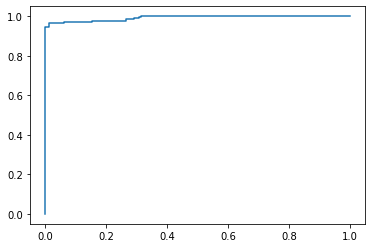

In [159]:
plt.plot(fpr, tpr)
plt.show()

## Optimal threshold

In [166]:
thr[np.argmax(tpr-fpr)]

0.253425147716555

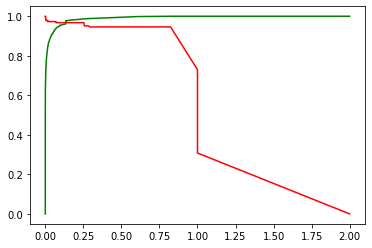

In [169]:
plt.plot(thr, 1-fpr, 'g-')
plt.plot(thr, tpr, 'r-')
plt.show()